# Step1

The data we are using is from UCI machine learning repository. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking 
institution. The classification goal is to predict if the client will subscribe a term 
deposit (variable y).  
https://archive-beta.ics.uci.edu/dataset/222/bank+marketing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
raw_data = pd.read_csv("Data/bank.csv", delimiter=";")

In [4]:
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
raw_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
print("We are choosing ")
print("This data belongs to banking domain")
print("This data has", raw_data.shape[0],"observations")
print("This data has", raw_data.shape[1],"variables")
print("Varibale 'bought_product' is the depedent variable")
print("There are five variables associated with protected class")
print("Age: ")
print("Marital: ")


We are choosing 
This data belongs to banking domain
This data has 4521 observations
This data has 17 variables
Varibale 'bought_product' is the depedent variable
There are five variables associated with protected class
Age: 
Marital: 


# Step2

In [7]:
data_young = raw_data[raw_data.age <= 45]
data_old = raw_data[raw_data.age > 45]


In [8]:
print(pd.unique(raw_data.job))
print(pd.unique(raw_data.marital))
print(pd.unique(raw_data.education))
print(pd.unique(raw_data.housing))

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']


In [9]:
def draw_membership_freq(membership: str):
        
    membership_types = tuple(pd.unique(raw_data[membership]))

    frequency_dict = {
        'frequency': raw_data[membership].value_counts().values.tolist(),
        'positve_freq':[len(raw_data[(raw_data['y']=='yes') & (raw_data[membership] == member)]) for member in membership_types],
        'negative_freq':[len(raw_data[(raw_data['y']=='no') & (raw_data[membership] == member)]) for member in membership_types],

    }

    x = np.arange(len(membership_types))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    
    
    fig, ax = plt.subplots()
    for attribute, measurement in frequency_dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title('Frequency by Membership '+membership)

    ax.set_xticks(np.arange(len(membership_types)))
    ax.set_xticklabels(membership_types, rotation=90)

    ax.legend(loc='upper left')
    ax.set_ylim(0, 8000)


    plt.show()

job
admin.           478
blue-collar      946
entrepreneur     168
housemaid        112
management       969
retired          230
self-employed    183
services         417
student           84
technician       768
unemployed       128
unknown           38
dtype: int64


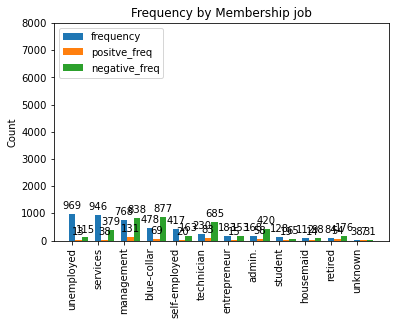

In [10]:
print(raw_data.groupby('job').size())
draw_membership_freq('job')

marital
divorced     528
married     2797
single      1196
dtype: int64


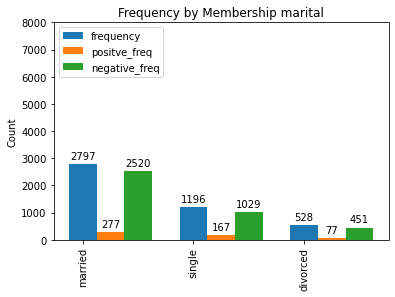

In [11]:
print(raw_data.groupby('marital').size())
draw_membership_freq('marital')



education
primary       678
secondary    2306
tertiary     1350
unknown       187
dtype: int64


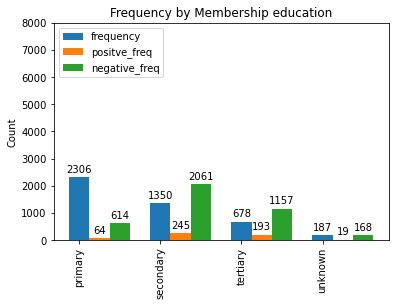

In [12]:
print(raw_data.groupby('education').size())
draw_membership_freq('education')


housing
no     1962
yes    2559
dtype: int64


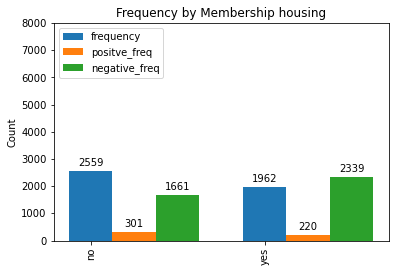

In [13]:
print(raw_data.groupby('housing').size())
draw_membership_freq('housing')


**Note: Run code cells in sequential order.**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
raw_data = pd.read_csv("Data/bank.csv", delimiter=";")

# Step 3 (1)
Based on your dataset, identify the privileged/unprivileged groups associated with each of your protected class variables.

In [15]:
# print('Protected classes: age and marital')
# print('Privileged groups: age -> old (age>45); marital -> married')
# print('Unprivileged groups: age -> young (age<=45); marital -> not married')

fairness_data = raw_data[['age', 'marital', 'y']]
fairness_data['age'] = fairness_data['age'].apply(lambda x: 'old' if x > 45 else 'young')
fairness_data['marital'] = fairness_data['marital'].apply(lambda x: 'married' if x == 'married' else 'not married')
print(fairness_data.head())

     age      marital   y
0  young      married  no
1  young      married  no
2  young  not married  no
3  young      married  no
4    old      married  no


C:\Users\cao66\AppData\Local\Temp/ipykernel_28100/2334193682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_data['age'] = fairness_data['age'].apply(lambda x: 'old' if x > 45 else 'young')
C:\Users\cao66\AppData\Local\Temp/ipykernel_28100/2334193682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_data['marital'] = fairness_data['marital'].apply(lambda x: 'married' if x == 'married' else 'not married')


# Step 3 (2)
For each protected class variable, select two fairness metrics and compute the fairness metrics associated with your privileged/unprivileged groups as a function of each of your two dependent variables.

In [16]:
# print('Fairness metrics selected: Disparate Impact and Equal Opportunity Difference.')
# create a confusion matrix
confusion_matrix_age = pd.crosstab(fairness_data['age'], fairness_data['y'])

# calculate the number of individuals in each group
n_old = confusion_matrix_age.loc['old'].sum()
n_young = confusion_matrix_age.loc['young'].sum()

n_old_yes = confusion_matrix_age.loc['old', 'yes']
n_young_yes = confusion_matrix_age.loc['young', 'yes']

n_old_no = confusion_matrix_age.loc['old', 'no']
n_young_no = confusion_matrix_age.loc['young', 'no']

# calculate the overall proportion of individuals that were classified as 'yes'
p_yes = (n_old_yes + n_young_yes) / (n_old + n_young)

# calculate the proportion of individuals in each group that were classified as 'yes'
p_old_yes = n_old_yes / n_old
p_young_yes = n_young_yes / n_young

# calculate metrics
disparate_impact_age = p_old_yes / p_young_yes
equal_opportunity_difference_age = abs(p_old_yes - p_young_yes)
# print('Age group Disparate Impact:', disparate_impact_age)
# print('Age group Equal Opportunity Difference:', equal_opportunity_difference_age)

# create a confusion matrix
confusion_matrix_marital = pd.crosstab(fairness_data['marital'], fairness_data['y'])

# calculate the number of individuals in each group
n_married = confusion_matrix_marital.loc['married'].sum()
n_not_married = confusion_matrix_marital.loc['not married'].sum()

n_married_yes = confusion_matrix_marital.loc['married', 'yes']
n_not_married_yes = confusion_matrix_marital.loc['not married', 'yes']

n_married_no = confusion_matrix_marital.loc['married', 'no']
n_not_married_no = confusion_matrix_marital.loc['not married', 'no']

# calculate the overall proportion of individuals that were classified as 'yes'
p_yes = (n_married_yes + n_not_married_yes) / (n_married + n_not_married)

# calculate the proportion of individuals in each group that were classified as 'yes'
p_married_yes = n_married_yes / n_married
p_not_married_yes = n_not_married_yes / n_not_married

# calculate the Disparate Impact
disparate_impact_marital = p_married_yes / p_not_married_yes
equal_opportunity_difference_marital = abs(p_married_yes - p_not_married_yes)

# print the Disparate Impact and Equal Opportunity Difference
# print('Marital group Disparate Impact:', disparate_impact_marital)
# print('Marital group Equal Opportunity Difference:', equal_opportunity_difference_marital)

# Step 3 (3)
Select a pre-processing bias mitigation algorithm to transform the original dataset (e.g. Reweighting, Disparate Impact Remover, etc.) as a function of one of your dependent variables.

In [17]:
# calculate the base rate of the privileged and unprivileged groups
base_rate_priv = fairness_data.loc[fairness_data['age'] == 'old', 'y'].value_counts(normalize=True)['yes']
base_rate_unpriv = fairness_data.loc[fairness_data['age'] == 'young', 'y'].value_counts(normalize=True)['yes']

# calculate the ratio of the base rates
base_rate_ratio = base_rate_priv / base_rate_unpriv

# calculate the desired rate for the unprivileged group
unpriv_desired_rate = fairness_data.loc[fairness_data['age'] == 'young', 'y'].value_counts(normalize=True)['yes'] * base_rate_ratio

# adjust the y values for the unprivileged group
fairness_data.loc[fairness_data['age'] == 'young', 'y'] = fairness_data.loc[fairness_data['age'] == 'young', 'y'].apply(
    lambda x: 'yes' if x == 'yes' and pd.np.random.rand() < unpriv_desired_rate else 'no'
)

C:\Users\cao66\AppData\Local\Temp/ipykernel_28100/1146626867.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  lambda x: 'yes' if x == 'yes' and pd.np.random.rand() < unpriv_desired_rate else 'no'
d:\Anaconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Step 3 (4)
Use the two fairness metrics identified in 3.2 and compute the fairness metrics on the transformed dataset.

In [18]:
# create a confusion matrix
confusion_matrix_age = pd.crosstab(fairness_data['age'], fairness_data['y'])

# calculate the number of individuals in each group
n_old = confusion_matrix_age.loc['old'].sum()
n_young = confusion_matrix_age.loc['young'].sum()

n_old_yes = confusion_matrix_age.loc['old', 'yes']
n_young_yes = confusion_matrix_age.loc['young', 'yes']

n_old_no = confusion_matrix_age.loc['old', 'no']
n_young_no = confusion_matrix_age.loc['young', 'no']

# calculate the overall proportion of individuals that were classified as 'yes'
p_yes = (n_old_yes + n_young_yes) / (n_old + n_young)

# calculate the proportion of individuals in each group that were classified as 'yes'
p_old_yes = n_old_yes / n_old
p_young_yes = n_young_yes / n_young

# calculate metrics
mitigated_disparate_impact_age = p_old_yes / p_young_yes
mitigated_equal_opportunity_difference_age = abs(p_old_yes - p_young_yes)
# print('Transformed dataset age group Disparate Impact:', mitigated_disparate_impact_age)
# print('Transformed dataset age group Equal Opportunity Difference:', mitigated_equal_opportunity_difference_age)

# create a confusion matrix
confusion_matrix_marital = pd.crosstab(fairness_data['marital'], fairness_data['y'])

# calculate the number of individuals in each group
n_married = confusion_matrix_marital.loc['married'].sum()
n_not_married = confusion_matrix_marital.loc['not married'].sum()

n_married_yes = confusion_matrix_marital.loc['married', 'yes']
n_not_married_yes = confusion_matrix_marital.loc['not married', 'yes']

n_married_no = confusion_matrix_marital.loc['married', 'no']
n_not_married_no = confusion_matrix_marital.loc['not married', 'no']

# calculate the overall proportion of individuals that were classified as 'yes'
p_yes = (n_married_yes + n_not_married_yes) / (n_married + n_not_married)

# calculate the proportion of individuals in each group that were classified as 'yes'
p_married_yes = n_married_yes / n_married
p_not_married_yes = n_not_married_yes / n_not_married

# calculate the Disparate Impact
mitigated_disparate_impact_marital = p_married_yes / p_not_married_yes
mitigated_equal_opportunity_difference_marital = abs(p_married_yes - p_not_married_yes)

# print the Disparate Impact and Equal Opportunity Difference
# print('Transformed dataset marital group Disparate Impact:', mitigated_disparate_impact_marital)
# print('Transformed dataset marital group Equal Opportunity Difference:', mitigated_equal_opportunity_difference_marital)

# Step 3 Output

In [19]:
print('Protected classes: age and marital')
print('Privileged groups: age -> old (age>45); marital -> married')
print('Unprivileged groups: age -> young (age<=45); marital -> not married')

print('Fairness metrics selected: Disparate Impact and Equal Opportunity Difference.')

print('Age group Disparate Impact:', disparate_impact_age)
print('Age group Equal Opportunity Difference:', equal_opportunity_difference_age)
print('Marital group Disparate Impact:', disparate_impact_marital)
print('Marital group Equal Opportunity Difference:', equal_opportunity_difference_marital)

print('Transformed dataset age group Disparate Impact:', mitigated_disparate_impact_age)
print('Transformed dataset age group Equal Opportunity Difference:', mitigated_equal_opportunity_difference_age)
print('Transformed dataset marital group Disparate Impact:', mitigated_disparate_impact_marital)
print('Transformed dataset marital group Equal Opportunity Difference:', mitigated_equal_opportunity_difference_marital)

table = pd.DataFrame({'Protected Class':['Age',"Marital"], 'Privileged Group':['Old','Married'], 'Unprivileged Group':['Young','Not Married'], 'Bias Mitigation Function':['Reweighting','Reweighting'], 'Disparate Impact':[disparate_impact_age,disparate_impact_marital], 
                      'Equal Opportunity Difference':[equal_opportunity_difference_age,equal_opportunity_difference_marital], 'Mitiaged Disparate Impact':[mitigated_disparate_impact_age,mitigated_disparate_impact_marital], 
                      'Mitiaged Equal Opportunity Difference':[mitigated_equal_opportunity_difference_age,mitigated_equal_opportunity_difference_marital]})
print(table)
table.to_csv('step3.csv', index=False)

Protected classes: age and marital
Privileged groups: age -> old (age>45); marital -> married
Unprivileged groups: age -> young (age<=45); marital -> not married
Fairness metrics selected: Disparate Impact and Equal Opportunity Difference.
Age group Disparate Impact: 1.227822355148859
Age group Equal Opportunity Difference: 0.024430949927147366
Marital group Disparate Impact: 0.6997368374780941
Marital group Equal Opportunity Difference: 0.04249664249149944
Transformed dataset age group Disparate Impact: 9.308606692523906
Transformed dataset age group Equal Opportunity Difference: 0.11752305519030526
Transformed dataset marital group Disparate Impact: 1.2643583326457835
Transformed dataset marital group Equal Opportunity Difference: 0.011960527811120135
  Protected Class Privileged Group Unprivileged Group  \
0             Age              Old              Young   
1         Marital          Married        Not Married   

  Bias Mitigation Function  Disparate Impact  Equal Opportunity 

# Step 4

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1) Randomly split your original dataset into training and testing datasets

In [21]:
raw_data = pd.read_csv("Data/bank.csv", delimiter=";")
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [22]:
fairness_data = raw_data[['age', 'marital', 'y']]
fairness_data['age'] = fairness_data['age'].apply(lambda x: 'old' if x > 45 else 'young')
fairness_data['marital'] = fairness_data['marital'].apply(lambda x: 'married' if x == 'married' else 'not married')
print(fairness_data.head())

#combine the priviledge/unpriviledge group into raw data to expedite later calculation
raw_data['age_p'] = fairness_data['age'].map({'old':0,'young':1})
raw_data['marital_p'] = fairness_data['marital'].map({'married':0,'not married':1})
print(raw_data.head())


     age      marital   y
0  young      married  no
1  young      married  no
2  young  not married  no
3  young      married  no
4    old      married  no
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  cellular   19   oct        79         1     -1         0  unknown  no   
1  cellular   11   may       220         1    339         4  failure  no   
2  cellular   16   apr       185         1    330         1  failure  no   
3   unknown    3   jun       199         4     -1         0  unknown  no   
4   unknown    5   may   

C:\Users\cao66\AppData\Local\Temp/ipykernel_28100/3206036445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_data['age'] = fairness_data['age'].apply(lambda x: 'old' if x > 45 else 'young')
C:\Users\cao66\AppData\Local\Temp/ipykernel_28100/3206036445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_data['marital'] = fairness_data['marital'].apply(lambda x: 'married' if x == 'married' else 'not married')


In [23]:
orig_x = raw_data[['age_p','marital_p','balance','day','duration','campaign','pdays','previous']]
orig_y = raw_data['y'].map({'no':0,'yes':1})
orig_x_train, orig_x_test, orig_y_train, orig_y_test = train_test_split(orig_x, orig_y,test_size=0.5)

2) Randomly split your transformed dataset into training and testing datasets (from Step 3.3)

In [24]:
#recreate the transformed dataset from step 3.3
# calculate the base rate of the privileged and unprivileged groups
base_rate_priv = fairness_data.loc[fairness_data['age'] == 'old', 'y'].value_counts(normalize=True)['yes']
base_rate_unpriv = fairness_data.loc[fairness_data['age'] == 'young', 'y'].value_counts(normalize=True)['yes']

# calculate the ratio of the base rates
base_rate_ratio = base_rate_priv / base_rate_unpriv

# calculate the desired rate for the unprivileged group
unpriv_desired_rate = fairness_data.loc[fairness_data['age'] == 'young', 'y'].value_counts(normalize=True)['yes'] * base_rate_ratio

# adjust the y values for the unprivileged group
fairness_data.loc[fairness_data['age'] == 'young', 'y'] = fairness_data.loc[fairness_data['age'] == 'young', 'y'].apply(
    lambda x: 'yes' if x == 'yes' and pd.np.random.rand() < unpriv_desired_rate else 'no'
)

tran_x = raw_data[['age_p','marital_p','balance','day','duration','campaign','pdays','previous']]
tran_y = fairness_data['y'].map({'no':0,'yes':1})
tran_x_train, tran_x_test, tran_y_train, tran_y_test = train_test_split(tran_x, tran_y,test_size=0.5)

#check the independent variable
tran_x_test.head()

C:\Users\cao66\AppData\Local\Temp/ipykernel_28100/2831191795.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  lambda x: 'yes' if x == 'yes' and pd.np.random.rand() < unpriv_desired_rate else 'no'
d:\Anaconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,age_p,marital_p,balance,day,duration,campaign,pdays,previous
825,1,1,1957,4,112,3,-1,0
1035,1,0,1852,15,298,2,-1,0
3939,1,0,243,20,41,3,-1,0
1071,1,0,0,13,57,5,349,1
3242,1,1,15,25,67,3,-1,0


3) Train a classifier using the original training dataset from Step 4.1; select one of your dependent variables as the output label to train your classifier.

In [25]:
clf = LogisticRegression(solver='liblinear', random_state=0)
# Train Decision Tree Classifer
clf = clf.fit(orig_x_train, orig_y_train)

#Predict the response for test dataset
orig_y_pred = clf.predict(orig_x_test)


4) Train a classifier using the transformed training dataset from Step 4.2; select one of your dependent variables as the output label to train your classifier.

In [26]:
#train the model using the transformed dataset
model_tran = LogisticRegression(solver='liblinear', random_state=0)

#exclude the new added columns from the training process
model_tran_fit = model_tran.fit(tran_x_train, tran_y_train)
tran_y_pred= model_tran_fit.predict(tran_x_test)

5) Select the privileged/unprivileged groups associated with one of your protected class variables (from Step 3.1); Use the two fairness metrics identified in Step 3.2 and and compute the fairness metrics for the classifier output associated with the original testing dataset and the transformed testing dataset

In [27]:
#choose age for this question
confusion_matrix_age_orig = pd.crosstab(orig_x_test['age_p'].map({0:'old',1:'young'}), pd.Series(orig_y_pred).map({0:'no',1:'yes'}))
print('Classifier output:')
print(confusion_matrix_age_orig)
# calculate the number of individuals in each group
n_old = confusion_matrix_age_orig.loc['old'].sum()
n_young = confusion_matrix_age_orig.loc['young'].sum()

n_old_yes = confusion_matrix_age_orig.loc['old', 'yes']
n_young_yes = confusion_matrix_age_orig.loc['young', 'yes']

n_old_no = confusion_matrix_age_orig.loc['old', 'no']
n_young_no = confusion_matrix_age_orig.loc['young', 'no']

# calculate the overall proportion of individuals that were classified as 'yes'
p_yes = (n_old_yes + n_young_yes) / (n_old + n_young)

# calculate the proportion of individuals in each group that were classified as 'yes'
p_old_yes = n_old_yes / n_old
p_young_yes = n_young_yes / n_young

# calculate metrics
disparate_impact_age_orig = p_old_yes / p_young_yes
equal_opportunity_difference_age_orig = abs(p_old_yes - p_young_yes)

print('Age group Disparate Impact:', disparate_impact_age_orig)
print('Age group Equal Opportunity Difference:', equal_opportunity_difference_age_orig)

Classifier output:
col_0   no  yes
age_p          
old    324   17
young  763   26
Age group Disparate Impact: 1.512858109632303
Age group Equal Opportunity Difference: 0.016900267237566387


In [28]:
confusion_matrix_age_trans = pd.crosstab(tran_x_test['age_p'].map({0:'old',1:'young'}), pd.Series(tran_y_pred).map({0:'no',1:'yes'}))
print('Classifier output:')
print(confusion_matrix_age_trans)
# calculate the number of individuals in each group
n_old = confusion_matrix_age_trans.loc['old'].sum()
n_young = confusion_matrix_age_trans.loc['young'].sum()

n_old_yes = confusion_matrix_age_trans.loc['old', 'yes']
n_young_yes = confusion_matrix_age_trans.loc['young', 'yes']

n_old_no = confusion_matrix_age_trans.loc['old', 'no']
n_young_no = confusion_matrix_age_trans.loc['young', 'no']

# calculate the overall proportion of individuals that were classified as 'yes'
p_yes = (n_old_yes + n_young_yes) / (n_old + n_young)

# calculate the proportion of individuals in each group that were classified as 'yes'
p_old_yes = n_old_yes / n_old
p_young_yes = n_young_yes / n_young

# calculate metrics
disparate_impact_age_tran = p_old_yes / p_young_yes
equal_opportunity_difference_age_tran = abs(p_old_yes - p_young_yes)

print('Age group Disparate Impact:', disparate_impact_age_tran)
print('Age group Equal Opportunity Difference:', equal_opportunity_difference_age_tran)

Classifier output:
col_0   no  yes
age_p          
old    364    8
young  755   11
Age group Disparate Impact: 1.4975562072336266
Age group Equal Opportunity Difference: 0.00714506302815913


6) For each fairness metric, in table format, indicate if there were any differences in the outcomes for the privileged versus unprivileged group. Was there a positive change, negative change, or no change on that fairness metric after transforming the dataset (from Step 3.4)? Was there a positive change, negative change, or no change on that fairness metric after training the classifier - with respect to the original testing dataset and the transformed testing dataset? [Note: Use your subjective opinion]

In [29]:
print('Privileged groups: age -> old (age>45)')
print('Unprivileged groups: age -> young (age<=45)')

table = pd.DataFrame({'Protected Class':['Age'], 'Privileged Group':['Old'], 'Unprivileged Group':['Young'], 'Disparate Impact':[disparate_impact_age_orig], 
                      'Equal Opportunity Difference':[equal_opportunity_difference_age_orig], 'Disparate Impact after Transform':[disparate_impact_age_tran], 
                      'Equal Opportunity Difference after Transform':[equal_opportunity_difference_age_tran]})
print(table)

Privileged groups: age -> old (age>45)
Unprivileged groups: age -> young (age<=45)
  Protected Class Privileged Group Unprivileged Group  Disparate Impact  \
0             Age              Old              Young          1.512858   

   Equal Opportunity Difference  Disparate Impact after Transform  \
0                        0.0169                          1.497556   

   Equal Opportunity Difference after Transform  
0                                      0.007145  


There is differences in the outcome for the priviledged versus unprivileged group. After transforming the dataset, there are negative change on the fairness metrics with respect to the original testing and the transformed testing dataset. As you can observe for the output table above, the disparate impact increased by a lot after transformation. However, the equal oppotunity difference is reduced after tranformation.